In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np
adult_data = pd.read_csv("adult_with_pii.csv")
adult_data['DOB'] = pd.to_datetime(adult_data['DOB'], errors='coerce')

# Some useful utilities

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

def your_code_here():
    return 1

## Part 1: Clipping

### Question 1 (5 points)

Define a function `z_clip` that clips elements of its input to lie below `b`. You may assume that no input will be less than 0.

*Hint*: for each element of `xs`, `z_clip` should return the minimum of the element and `b`.

In [2]:
def z_clip(xs, b):
    return xs.clip(lower=0, upper=b)

### Question 2 (5 points)

Write code to (1) clip the values of the `Capital Gain` column of the dataset, and (2) compute the average of the clipped values. Run your code for various values of the clipping parameter `b`.

*Hint*: you can use `np.sum()` to sum up the values in a single column of a dataframe.

In [3]:
cg = adult_data['Capital Gain']
for i in range (1, 300001, 10000):
    x = z_clip(cg, i)
    print(i, " ", x.sum()/x.shape[0])

1   0.08328982525106723
10001   526.5809096772213
20001   672.8438930008292
30001   734.5153404379472
40001   784.5896624796536
50001   833.5014895119929
60001   882.3329136083045
70001   931.164337704616
80001   979.9957618009275
90001   1028.8271858972391
100001   1077.6488437087312
110001   1077.6488437087312
120001   1077.6488437087312
130001   1077.6488437087312
140001   1077.6488437087312
150001   1077.6488437087312
160001   1077.6488437087312
170001   1077.6488437087312
180001   1077.6488437087312
190001   1077.6488437087312
200001   1077.6488437087312
210001   1077.6488437087312
220001   1077.6488437087312
230001   1077.6488437087312
240001   1077.6488437087312
250001   1077.6488437087312
260001   1077.6488437087312
270001   1077.6488437087312
280001   1077.6488437087312
290001   1077.6488437087312


### Question 3 (5 points)

Write code to return the differentially private average of `Capital Gain` parameterized by the clipping parameter `b`. Run your code for various values of `b` and use `pct_error` to determine the error introduced for each value of `b`.

In [19]:
for i in range (1, 300001, 10000):
    epsilon = 1
    clipped_data = z_clip(cg, i)
    mean = clipped_data.sum()/clipped_data.shape[0]
    d_mean = laplace_mech(clipped_data.sum(), i, epsilon) / laplace_mech(clipped_data.shape[0], 1, epsilon)
    print(i, d_mean, pct_error(mean, d_mean), sep='\t')

1	0.0832920117567261	0.002625177387840936
10001	526.3272335480899	0.04817419782400499
20001	672.8044912429934	0.005856002892446197
30001	730.5549912352327	0.5391785555293072
40001	784.6459033486966	0.007168188893191442
50001	833.4189807873156	0.009899049457677188
60001	881.1632279984585	0.13256737811836888
70001	932.9671086417802	0.19360394982567983
80001	980.332232799453	0.03433392384341674
90001	1029.2874450905317	0.04473629775745035
100001	1070.8283480650741	0.6329052068746546
110001	1077.3210443884268	0.030418008817814087
120001	1073.1862153374539	0.41410784202386247
130001	1077.7960295605544	0.013658053148062906
140001	1089.1282313504032	1.0652252548395709
150001	1076.6432717544271	0.09331165343651102
160001	1075.9878201555946	0.1541340263884277
170001	1065.9360934532936	1.086880046669765
180001	1077.111492573237	0.04986328697248872
190001	1089.0248862948135	1.0556353911104912
200001	1078.2743360097934	0.05804231171534151
210001	1080.624620726939	0.2761360563397064
220001	1067.881

### Question 4 (5 points)

In 5-10 sentences, answer the following:

- In Question 2, at approximately what value of the clipping parameter `b` does the clipped average approach the original (un-clipped) average?
- What is the sensitivity of the clipped average at this value of `b`, and why?
- In Question 3, at approximately what value of the clipping parameter `b` is the error minimized?
- Which seems to be more important for accuracy - the value of `b` or the scale of the noise added? Why?
- Do you think the answer to the previous point will be true for every dataset? Why or why not?

- This occurs at `b = 100001`.
- The sensitivity is b because adding a row will change the result by, at most, b.
- This occurs at `b = 100001`.
- The scale of the noise added is more important as this value directly affects final results.
- I believe that this is true for every dataset. If a function directly affects the value of the output of a query, the data is irrelevant as long as it is numerical.

### Question 5 (20 points)

Write a function `auto_avg` that returns the differentially private average of an array of values `xs`. Your function should **automatically** determine the clipping parameter `b`, and should enforce differential privacy for a **total** privacy cost of `epsilon`.

In [13]:
def auto_avg(xs, epsilon):
    
    dp_results = {}
    for i in range(1, 300001, 10000):
        t_clipped_data = z_clip(xs, i)
        t_mean = t_clipped_data.sum()/t_clipped_data.shape[0]
        t_d_mean = laplace_mech(t_clipped_data.sum(), i, epsilon) / laplace_mech(t_clipped_data.shape[0], 1, epsilon)
        dp_results[i] = pct_error(t_mean, t_d_mean)
    b = min(dp_results, key=dp_results.get)
    clipped_data = z_clip(xs, b)
    return f"Average: {laplace_mech(t_clipped_data.sum(), b, epsilon) / laplace_mech(t_clipped_data.shape[0], 1, epsilon)}; Selected clipping parameter: {b}"

auto_avg(cg, 1)

'Average: 1070.375681613603; Selected clipping parameter: 230001'

### Question 6 (10 points)

In 5-10 sentences, answer the following:
- Summarize (1-2 sentences only) your approach in `auto_avg`.
- Briefly argue that your implementation has privacy cost of `epsilon`.
- How close is your function able to get to the "best" result you got in Question 3? What accounts for the difference?
- Will your approach work well for **all** datasets? If not, describe a dataset for which it is likely to return very inaccurate results.

- For this task, I made use of `pct_error` in order to find the lowest error and use the value of `b` that produced it.
- For each query, the result is the product of a parallel composition of two queries. Thus, their combined privacy cost is the same.
- The function is able to consisently get accurate results. Discrepancies occur because of the differential privacy noise.
- This function will not work well for all data. For example, it would not be ideal for complex datasets that map data to construct dynamic values.

## Part 2: $(\epsilon, \delta)$-differential privacy

### Question 7 (5 points)

Consider the code below, which graphs the total privacy cost of an averaging attack under (1) sequential composition and (2) advanced composition, for values of `k` between 1 and 200.

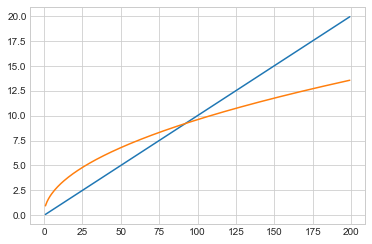

In [21]:
epsilon = .1
delta_p = 1e-5

def query():
    return len(adult_data[adult_data['Martial Status'] == 'Divorced'])

def avg_attack(k):
    return np.mean([laplace_mech(query(), 1, epsilon) for i in range(k)])
    
xs = range(1, 200)
privacy_cost_sequential = [k * epsilon for k in xs]
privacy_cost_advanced = [2 * epsilon * np.sqrt(2 * k * np.log(1/delta_p)) for k in xs]

plt.plot(xs, privacy_cost_sequential);
plt.plot(xs, privacy_cost_advanced);

In 2-5 sentences, answer the following:
- At approximately what point do the lines representing the two approaches cross? What does this mean about **which** composition technique should be used for an iterative algorithm?
- The two lines represent **different** privacy costs for the **same** algorithm. How can both be correct?

- The lines approach at approximately x = 90; both composition techniques work, but for values less than x = 70, sequential composition is better.
- It is not a matter of correctness, but rather one of privacy cost. For small iterations, sequential composition is best; for large ones, advanced composition is.

### Question 8 (10 points)

In the cell below, define a function that implements the vector version of the Laplace mechanism. An implementation that works for a single number is defined for reference as `laplace_mech` above.

In [22]:
def laplace_mech_vec(qs, sensitivity, epsilon):
    return [laplace_mech(q, sensitivity, epsilon) for q in qs]

### Question 9 (10 points)

In the cell below, define a function that implements the vector version of the Gaussian mechanism. An implementation that works for a single number is defined for reference as `gaussian_mech` above.

In [23]:
def gaussian_mech_vec(qs, sensitivity, epsilon, delta):
    return [gaussian_mech(q, sensitivity, epsilon, delta) for q in qs]

### Question 10 (10 points)

Consider the code below, which defines three average queries and runs them on `adult_data`, using the Laplace mechanism to provide differential privacy with $\epsilon = 1$ for each query.

In [24]:
b_capgain = 3000
b_year = 3000
b_age = 3000

epsilon = 1
n = len(adult_data)

def query1():
    return np.sum(z_clip(adult_data['Capital Gain'], b_capgain))/n

def query2():
    return np.sum(z_clip(adult_data['DOB'].dt.year, b_year))/n

def query3():
    return np.sum(z_clip(adult_data['Age'], b_age))/n

def my_query():
    return [query1(), query2(), query3()]

my_query()

[235.98968090660605, 1981.2278185559412, 38.58164675532078]

In 2-5 sentences, answer the following:
- What is the $L_1$ sensitivity of `my_query`, and why?
- What is the $L_2$ sensitivity of `my_query`, and why?

- The sensitivity is equal to the sum of the elementwise sensitivities of each query.
- The sensitivity is the square root of the sum of the elementwise sensitivities.

### Question 11 (5 points)

In the cell below, write code to release the results of calling `my_query()` with differential privacy, without using sequential composition.

*Hint*: use `laplace_mech_vec`, but be careful of sensitivity!

In [26]:
laplace_mech_vec(my_query(), np.sqrt(sum(my_query())), epsilon)

[244.0140963957935, 2014.128760595741, 19.01276978647182]

### Question 12 (5 points)

In 2-5 sentences, answer the following:
- What is the total privacy cost of your answer to Question 11, and why? *Hint*: there should be *only* one call to the Laplace mechanism, and so sequential composition is not needed!

- With $\delta = 10^{-5}$, the privacy cost is 

\begin{align}
\epsilon = & 2 \sqrt{6 \log(100000)}\\
\approx&  22.60
\end{align}

### Question 13 (5 points)

In the cell below, write code to release the results of `my_query()` with differential privacy, but using the Gaussian mechanism.

*Hint*: remember to use $L_2$ sensitivity

In [33]:
gaussian_mech_vec(my_query(), np.sqrt(sum(my_query())), epsilon, 10**(-5))

[310.71561870858574, 2315.7730578178453, 91.89640353405684]